<a href="https://colab.research.google.com/github/ferreiraluisa/faculdade/blob/main/luisa102026lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalar Plugin para Verilog

Executar o comando abaixo.

In [ ]:
!pip install git+git://github.com/canesche/nvcc4jupyter.git
!git clone https://github.com/canesche/nvcc4jupyter
%load_ext nvcc_plugin

  Cloning git://github.com/canesche/nvcc4jupyter.git to /tmp/pip-req-build-h6wsowzt
  Running command git clone -q git://github.com/canesche/nvcc4jupyter.git /tmp/pip-req-build-h6wsowzt
  Created wheel for NVCCPlugin: filename=NVCCPlugin-0.0.3-cp36-none-any.whl size=8022 sha256=bf49ee84d2c391cac382cbc8a69f0030e9b00b7e53d413341ab144ac3e90da5e
  Stored in directory: /tmp/pip-ephem-wheel-cache-iesdsj_m/wheels/87/ae/09/21c6e192181a0472e20ddd1d5212e2cbb113f00ebe14330d0d
Successfully built NVCCPlugin
fatal: destination path 'nvcc4jupyter' already exists and is not an empty directory.
The nvcc_plugin extension is already loaded. To reload it, use:
  %reload_ext nvcc_plugin


# Video com instruções

Assista o [Video com instrucoes para o laboratorio](https://youtu.be/fJwupjXgsIE)

# Operadores da lógica  Booleana em Verilog

Os operadores são: 
* And &
* Or |
* xor ^
* Inversão ou negação ~

Alguns exemplos de equações:
* x = (a and c) xor d
* y = b or not d
* z = c xor (not a)

Abaixo um código Verilog com as equações no modulo test. Os sinais de entrada são a,b,c e d. Portanto temos 16 possibilidades para 4 variáveis, 2⁴. Declaramos 3 funções de saída x,y e z. O programa irá avaliar todas as combinações montando a tabela verdade.

In [ ]:
%%verilog 
module test(a, b, c, d, x, y, z);
input a,b,c,d; // definir as entradas
output x,y,z;  // definir as saidas

// as tres equacoes
    assign x = (a & c) ^ d;
    assign y = b | ~d;
    assign z = c ^~ a;

endmodule



module logic_testbench();  // Esta parte do codigo é para gerar os 16 valores
reg [3:0] counter;
wire x,y,z;
integer k;
	test t(counter[3],counter[2],counter[1],counter[0],x,y,z); 
	initial begin
		$display("abcd | x y z");
		$monitor("%4b | %1b %1b %1b", counter, x, y, z);
		counter = 0;
		for (k=1; k<16; k=k+1)
     #1 counter = k;
		$finish;
	end
endmodule

abcd | x y z
0000 | 0 1 0
0001 | 1 0 0
0010 | 0 1 1
0011 | 1 0 1
0100 | 0 1 0
0101 | 1 1 0
0110 | 0 1 1
0111 | 1 1 1
1000 | 0 1 1
1001 | 1 0 1
1010 | 1 1 0
1011 | 0 0 0
1100 | 0 1 1
1101 | 1 1 1
1110 | 1 1 0
1111 | 0 1 0



# Exercicio 1
Completar o código abaixo para fazer a função f= a XOR b.

In [ ]:
%%verilog 
module test(a, b, f);
input a,b; // definir as entradas
output f;  // definir as saidas

// COMPLETAR AQUI 
    assign f = a ^ b ;
endmodule

module logic_testbench();  // Esta parte do codigo é para gerar os 4 valores
reg [1:0] counter;
wire f;
integer k;
	test t(counter[1],counter[0],f); 
	initial begin
		$display("a b | f");
		$monitor("%2b | %1b", counter, f);
    counter = 0;
		for (k=1; k<4; k=k+1)
     #1 counter = k;
		$finish;
	end
endmodule

a b | f
00 | 0
01 | 1
10 | 1
11 | 0



# Exercicio 2 
Podemos verificar se duas equações booleanas observando a tabela verdade. A função f = a XOR b é equivalente a função g= ( a And  Not b) OR ( Not a And b). Complete o código abaixo com as funções f e g. Verifique se a tabela impressa tem os mesmo valores para todas as combinações de entrada. Abaixo o circuito do XOR com AND e OR. ![xor](https://pxt.azureedge.net/blob/addd335c5333435473f8392c4e48614b060b0bfa/static/courses/logic-lab/logic-gates/combinatorial1-xor.png)

In [ ]:
%%verilog 
module test(a, b, f,g);
input a,b; // definir as entradas
output f,g;  // definir as saidas

// COMPLETAR AQUI, não esqueça o ; no final da linha
    assign f = a ^ b;
    assign g =(a & ~b) | (~a & b);
endmodule

module logic_testbench();  // Esta parte do codigo é para gerar os 4 valores
reg [1:0] counter;
wire f,g;
integer k;
	test t(counter[1],counter[0],f,g); 
	initial begin
		$display("a b | f g");
		$monitor("%2b  | %1b %1b", counter, f,g);
    counter = 0;
		for (k=1; k<4; k=k+1)
     #1 counter = k;
		$finish;
	end
endmodule

a b | f g
00  | 0 0
01  | 1 1
10  | 1 1
11  | 0 0



# Exercicio 3

Implemente as identidades a seguir em função do seu último dígito de matrícula.

* final 0,1: Associatividade f = x AND ( y AND z), g= (x AND y) AND z, f é equivalente a g ?
* final 2,3: Associatividade com operador OR
* final 4,5: Associatividade com operador XOR
* final 6,7: Distributiva f = x OR ( y AND z), g= (x OR y) AND (x OR z), f é equivalente a g ?
* final 8,9: Distributiva f = x AND ( y OR z), g= (x AND y) OR (x AND z), f é equivalente a g ?



In [ ]:
%%verilog 
module test(x, y, z ,f,g);
input x,y,z; // definir as entradas
output f,g;  // definir as saidas

// COMPLETAR AQUI, não esqueça o ; no final da linha
    assign f = x | (y & z);
    assign g = (x | y) & (x | z);
endmodule

module logic_testbench();  // Esta parte do codigo é para gerar os 4 valores
reg [2:0] counter;
wire f,g;
integer k;
	test t(counter[2],counter[1],counter[0],f,g); 
	initial begin
		$display("xyz | f g");
		$monitor("%3b | %1b %1b ", counter, f,g);
    counter = 0;
		for (k=1; k<8; k=k+1)
     #1 counter = k;
		$finish;
	end
endmodule

xyz | f g
000 | 0 0 
001 | 0 0 
010 | 0 0 
011 | 1 1 
100 | 1 1 
101 | 1 1 
110 | 1 1 
111 | 1 1 



# Exercicio 4
Escreva a equação implementada por ![este circuito](https://www.electronics-tutorials.ws/wp-content/uploads/2018/05/combination-comb25.gif)

In [ ]:
%%verilog 
module test(a,b,c,q);
input a,b,c; // definir as entradas
output q;  // definir as saidas

// COMPLETAR AQUI, não esqueça o ; no final da linha
    assign q = ~(a & b) & c & ~(a | b);
endmodule

module logic_testbench();  // Esta parte do codigo é para gerar os 4 valores
reg [2:0] counter;
wire q;
integer k;
	test t(counter[2],counter[1],counter[0],q); 
	initial begin
		$display("abc | q");
		$monitor("%3b | %1b ", counter, q);
    counter = 0;
		for (k=1; k<8; k=k+1)
     #1 counter = k;
		$finish;
	end
endmodule

abc | q
000 | 0 
001 | 1 
010 | 0 
011 | 0 
100 | 0 
101 | 0 
110 | 0 
111 | 0 



# Exercicio 5
O circuito abaixo é conhecido com somador completo pois implementa com operações lógicas a operação de soma a + b + ci, onde ci é o vem-um, as saídas são a soma s e o vai-um co. A ci = carry-in e co = carry-out, termos em inglês. Implemente as funções s e c. O código abaixo compara com a operação de soma. ![somadorcompleto](https://pxt.azureedge.net/blob/c4db02c7977f4de230b480ff12f11d090cc22a8e/static/courses/logic-lab/logic-gates/full-adder.png)

In [ ]:
%%verilog 
module test(a,b,ci,s,co);
input a,b,ci; // definir as entradas
output s,co;  // definir as saidas

// COMPLETAR AQUI, não esqueça o ; no final da linha
    assign s = (a ^ b) ^ ci;
    assign co= (a & b) | (ci&(a^b));
endmodule

module logic_testbench();  // Esta parte do codigo é para gerar os 4 valores
reg [2:0] counter;
wire q;
integer k;
	test t(counter[2],counter[1],counter[0],s,co); 
	initial begin
		$display("abc | s co");
		$monitor("%3b | %1b %1b", counter, s,co);
    counter = 0;
		for (k=1; k<8; k=k+1)
     #1 counter = k;
		$finish;
	end
endmodule

abc | s co
000 | 0 0
001 | 1 0
010 | 1 0
011 | 0 1
100 | 1 0
101 | 0 1
110 | 0 1
111 | 1 1



# Exercicio 6
Um circuito pode ser descrito na forma estrutural com as portas lóógicas como módulos ou através das equações lógicas com o comando **assign**. Abaixo o exercicio 2 foi refeito usando uma descrição estrutural.

In [ ]:
%%verilog 
module test(a, b, f,g);
input a,b; // definir as entradas
output f,g;  // definir as saidas

// F é o nome da instancia da porta XOR, o primeiro parametro é a saída
// seguido de a e b que são as entradas
    xor F (f,a,b);
/*
               +------+                                  
   a  ---------|      |  w2                              
       |       | and x|--+                               
    +----inv   |      |  |  +------+                     
    |  |    w3 +------+  -- |      |                     
    |  |                    | or g |----- g              
    |  |    w4 +------+ |---|      |                     
    |  +--inv  |      | |   +------+                     
    |          | and y|-+w1                              
 b ----------- |      |                                  
               +------+                                  
                        
*/
   wire w1,w2,w3,w4; // fios intermediarios
  not W3 (w3,b);
  not W4 (w4,a);
  and X (w2,a,w3);
  and Y (w1,b,w4);
  or G (g,w1,w2);
endmodule

module logic_testbench();  // Esta parte do codigo é para gerar os 4 valores
reg [1:0] counter;
wire f,g;
integer k;
	test t(counter[1],counter[0],f,g); 
	initial begin
		$display("a b | f g");
		$monitor("%2b  | %1b %1b", counter, f,g);
    counter = 0;
		for (k=1; k<4; k=k+1)
     #1 counter = k;
		$finish;
	end
endmodule

a b | f g
00  | 0 0
01  | 1 1
10  | 1 1
11  | 0 0



# Exercicio 7

Refaça o exercicio 4 com uma descrição estrutural. Utilize o exemplo acima e a implementação do exercicio 4. Dica: (a) Copiar o codigo do exercicio 4. (b) apague a parte dos comandos **assign**. (c) Veja quantos fios você precisa criar (d) lembre-se que cada porta deve ter um nome, **and** X1 (w2,a,b) é uma porta and com o nome X1, com a saida w2 e as entradas a e b. (e) Voce pode usar as portas **nand** e **nor** em Verilog. 

Se voce quiser desenhar como comentário, pode usar o [editor online de caracteres](https://textik.com/). Como dentro de umas linhas com /*  para começar e */ para terminar.

In [ ]:
%%verilog 
module test(a,b,c,q);
input a,b,c; // definir as entradas
output q;  // definir as saidas

// COMPLETAR AQUI, não esqueça o ; no final da linha
/*                                                                              
 a ----------+----------+                                                    
    |        | nand w1  |-------|                                            
    |        |          |  w1   |                                            
 b -|--------+----------+       |                                            
    |   |                       |----------+                                 
    |   |                       |          |  q                              
 c -|---|-----------------------|  and Q   |--------                         
    |   |                       |          |                                 
    |---|----+-----------+      +----------+                                 
        |    |  nor W2   |  w2  |                                            
        |    |           |------|                                            
        |----+-----------+                                                   
  */
    wire w1,w2;
    nand W1(w1,a,b);
    nor W2(w2,a,b);
    and Q(q,w1,c,w2);
endmodule

module logic_testbench();  // Esta parte do codigo é para gerar os 4 valores
reg [2:0] counter;
wire q;
integer k;
	test t(counter[2],counter[1],counter[0],q); 
	initial begin
		$display("abc | q");
		$monitor("%3b | %1b ", counter, q);
    counter = 0;
		for (k=1; k<8; k=k+1)
     #1 counter = k;
		$finish;
	end
endmodule

abc | q
000 | 0 
001 | 1 
010 | 0 
011 | 0 
100 | 0 
101 | 0 
110 | 0 
111 | 0 



# Exercicio 8
Refaça o exercicio 5 com uma descrição estrutural. Utilize as dicas do exercicio 7.

In [ ]:
%%verilog 
module test(a,b,ci,s,co);
input a,b,ci; // definir as entradas
output s,co;  // definir as saidas

// COMPLETAR AQUI, não esqueça o ; no final da linha
/*           +--------+           +--------+                                                                                          
  a ---------|        |-----------|        |                                                                                          
      |      | xor A  |w1  |      | xor S  |----s-------                                                                              
  b -----|---|        |    | |-ci-|        |                                                                                          
      |  |   +--------+    | |    +--------+                                                                                          
      |  |                 | |                                                                                                        
      |  |                 | |                                                                                                        
      |  |                 | |    +--------+                                                                                          
 ci------------------------|------|        |                                                                                          
      |  |                 |      | and W3 |        +--------+                                                                        
      |  |   +--------+    |------|        |-w3-----|        |                                                                        
      |--|---|        |           +--------+        | or CO  |-co-------                                                              
         |   | and W2 |w2------------------------w2-|        |                                                                        
         |---|        |                             +--------+                                                                        
             +--------+                                                                                                               
 */                                                                                                                                     
                                                                                                                                                                     
    xor A(w1,a,b);
    xor S(s,w1,ci);
    and W2(w2,a,b);
    and W3(w3,w1,ci);
    or CO(co,w2,w3);

endmodule

module logic_testbench();  // Esta parte do codigo é para gerar os 4 valores
reg [2:0] counter;
wire q;
integer k;
	test t(counter[2],counter[1],counter[0],s,co); 
	initial begin
		$display("abc | s co");
		$monitor("%3b | %1b %1b", counter, s,co);
    counter = 0;
		for (k=1; k<8; k=k+1)
     #1 counter = k;
		$finish;
	end
endmodule

abc | s co
000 | 0 0
001 | 1 0
010 | 1 0
011 | 0 1
100 | 1 0
101 | 0 1
110 | 0 1
111 | 1 1



Outro comando interessante é visualizar o seu circuito, pode ser util para "debugar" sua descrição estrutural. A seguir dois exemplos. 

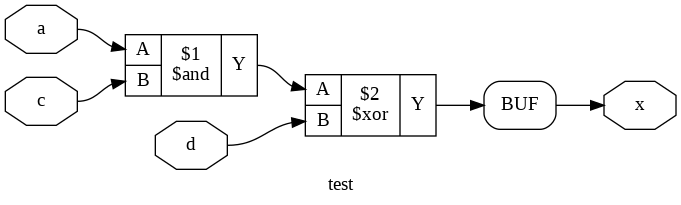

In [ ]:
%%print_verilog
module test(a, c, d, x);
input a,c,d;
output x;

    assign x = (a & c) ^ d;

endmodule

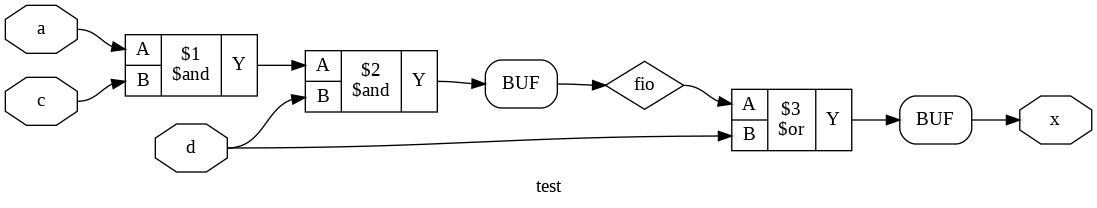

In [ ]:
%%print_verilog
module test(a, c, d, x);
input a,c,d;
output x;
wire fio;
    and G1(fio,a,c,d);
    or G2(x,fio,d);

endmodule




Parabéns, você terminou o laboratório 2. Não esqueça de submeter o link no google classroom. 